<a href="https://colab.research.google.com/github/Aaesha-Alteneiji/Foundation-Of-Data-Science/blob/main/AaeshaAlteneiji_Activity3_AirQuality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Aaesha-Alteneiji/Foundation-Of-Data-Science/blob/main/AaeshaAlteneiji_Activity3_AirQuality.ipynb)

# <font color = blue size = 6> **Activity #3 (5 marks)**


<font color = green size = 5> **Activity: Air Quality Analysis in NYC**

# Objective:
- **Objective:**  
The goal of this assignment is to analyze air quality data collected from low-cost sensors mounted on moving vehicles in New York City. Using the concepts learned in the chapters on Sampling and Empirical Distributions , Testing Hypotheses , and Estimation , you will perform statistical analysis to estimate pollution levels, test hypotheses about differences in pollution across neighborhoods, and construct confidence intervals for key parameters.

You are provided with a `Datascience` `Table` named `joined_table`, which contains air quality readings (`pm10`) and their corresponding administrative divisions (neighborhoods) in NYC. The table has been preprocessed and joined with neighborhood boundaries using geospatial operations. Your task is to perform all subsequent tasks using the `Datascience` Table abstraction as taught in class.

given a csv file containing longitude, latitude , and pm10  columns [Air Quality data](https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/NYC_PM.csv) representing readings of low cost air quality sensor mounted on moving vehicles, in addition to a geojson file containing polygons representing administrative divisions of NYC city known as neighbourhoods [nyc_polygon.geojson](https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/nyc_polygon.geojson).
# Dataset Description
- Air Quality Sensor Readings (NYC_PM.csv) :
Attributes: SensorID, time, temperature, humidity, pm25,
Focus attributes: temperature, humidity, pm1,pm25,pm10,
- City Polygons (nyc_polygon.geojson) :
Contains polygons representing neighborhoods or boroughs in NYC.
Used for spatially joining geographic information with air quality data.

## **part - A** preprocessing [0 marks]

do all tasks and the subtasks!

# Onboarding Code Provided
- The following code will be provided in an onboarding Jupyter Notebook to help students get started:



In [1]:
'''from google.colab import drive
drive.mount('/content/drive')'''

"from google.colab import drive\ndrive.mount('/content/drive')"

import necessary libraries

In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from datascience import *
%matplotlib inline
#path_data = '../../../assets/data/'
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np

###1. Read the CSV file containing PM sensor readings
 & Read the GeoJSON file containing neighborhood boundaries into a GeoDataFrame

In [4]:

# Step 1: Read the CSV file containing PM10 sensor readings
pm10_data = pd.read_csv('https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/NYC_PM.csv',index_col=False)

# Step 2: Read the GeoJSON file containing neighborhood boundaries into a GeoDataFrame
nyc_neighborhoods = gpd.read_file('https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/nyc_polygon.geojson')


In [5]:
#pm10_data.dtypes

### 2. convert the csv into a geodataframe and join it (sjoin) with the geojson, assign a coordinate reference system (CRS) the csv geodataframe which is identical to that of the geojson file, then perform the join, the result is a geodataframe, convert it to dataframe, and select pm10, neighborhood columns in a new dataframe

In [6]:
pm10_gdf = gpd.GeoDataFrame(pm10_data, geometry=gpd.points_from_xy(pm10_data.longitude, pm10_data.latitude))
merged_data = gpd.sjoin(pm10_gdf, nyc_neighborhoods, how='inner', predicate='within')

<ipython-input-6-d43866676e2a>:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  merged_data = gpd.sjoin(pm10_gdf, nyc_neighborhoods, how='inner', predicate='within')


In [7]:
#merged_data.dtypes

In [8]:
pollution_data = merged_data[['pm10','neighborhood']]

In [9]:
pollution_data.shape[0]

118495

In [10]:
#merged_data.rename(columns={'neighborhood': 'neighborhood1'}, inplace=True)

In [11]:
type(pollution_data)

pandas.core.frame.DataFrame

3. you need to convert</h1></section> from dataframe to Datascience Table. Use the following format: ```Table.from_df(df, keep_index=False)``` read more here
[create DS Table from DF](https://www.data8.org/datascience/_autosummary/datascience.tables.Table.from_df.html)

**N.B.** <font color='red'>NOW, perform all tasks using the table abstraction as we have learned in the class!</font>

the following is the opposite:

[Table.to_df](https://www.data8.org/datascience/_autosummary/datascience.tables.Table.to_df.html)

what is the maximum pm10 value

In [12]:
pollution_data['pm10'].max()

87341.71

what is the maximum pm10 value

In [13]:
pollution_data['pm10'].min()

0.0

In [14]:
joined_table = Table().from_df(pollution_data)

show the first few rows of the table?

In [15]:
joined_table.show(2)

pm10,neighborhood
11.35,Bronx Park
1.18,Bronx Park


print minimum and maximum pm10 values?

In [16]:
pm10 = joined_table.column('pm10')
min(pm10), max(pm10)

(0.0, 87341.710000000006)

#Instructions for Students
-You task is to analyze NYC hyperlocal air quality data using the provided dataset. Complete the following tasks in your Jupyter Notebook.total of 5 marks . Use the Table abstraction.

# Tasks

## <font color = blue size  = 5>**Task 1: Sampling and Empirical Distribution (1 Mark)**

**Task Description:**

- Randomly sample 10% of the rows from the joined_table without replacement.
- Compute the mean pm10 value for this sample.
- Create an empirical histogram of the pm10 values from the sampled data using 10 bins.
- Comment on the shape of the histogram and compare it to the distribution of the full dataset.

<font color = red size= 5> attention</font>

remove pm10 values that are unreasonably high (above 300 µg/m³)

In [17]:
joined_table = joined_table.where('pm10', are.below(300))

In [18]:
len(joined_table)

2

In [19]:
joined_table.num_rows

117356

In [20]:
#Task 1.1: Randomly sampling 10% of the joind_table data without replacement
sample_data = joined_table.sample(round(0.1 * joined_table.num_rows), with_replacement= False)
sample_data

pm10,neighborhood
44.95,Soundview
0.54,Bronx Park
3.94,Bronx Park
0.28,Bronx Park
40.24,Hunts Point
0.11,Hunts Point
1.28,Hunts Point
0.49,Longwood
0.59,Longwood
1.92,Soundview


In [21]:
#Task 1.2: Calculating the mean pm10 value for the sampled data
np.mean(sample_data["pm10"])

15.872517041581457

Text(0.5, 1.0, 'PM10 Values Empirical Distribution')

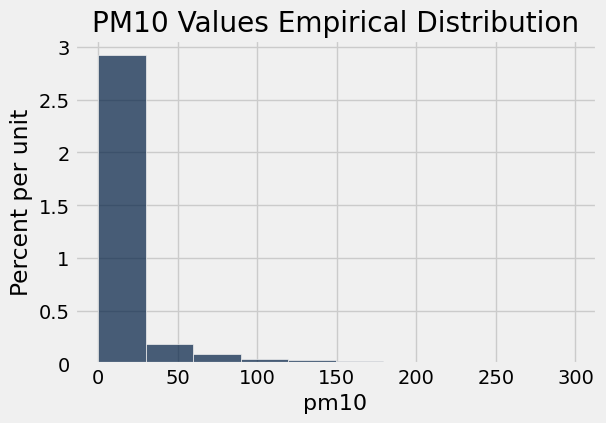

In [22]:
#Task 1.3: Ploting empirical histogram for pm10 value of the sampled data using 10 bins
sample_data.hist("pm10", bins = 10)
plt.title("PM10 Values Empirical Distribution")

Text(0.5, 1.0, 'PM10 Values Distribution')

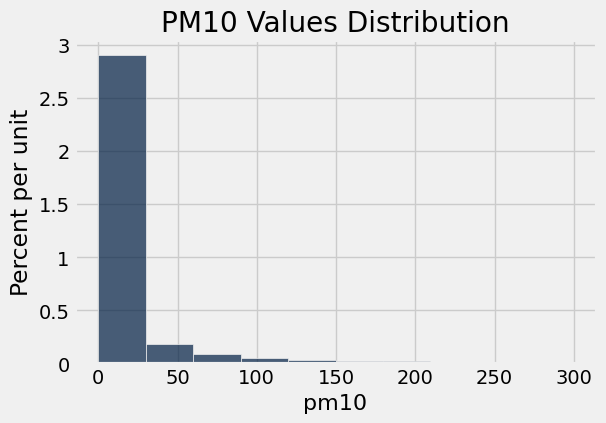

In [23]:
#Task 1.4.1: Ploting the histogram for pm10 value of the sampled data using 10 bins
joined_table.hist("pm10", bins = 10)
plt.title("PM10 Values Distribution")

In [24]:
#Task 1.4.2: Checking the precentage of pm10 sample and full data distriubtion where the area is high
print("Sample Data: Below 30: ", round((sample_data.where("pm10", are.below(30)).num_rows / sample_data.num_rows) * 100), "%, Above 180: ",
      round((sample_data.where("pm10", are.above_or_equal_to(150)).num_rows / sample_data.num_rows) * 100), "%")
print("Full Data: Below 30: ", round((joined_table.where("pm10", are.below(30)).num_rows / joined_table.num_rows) * 100), "%, Above 180: ",
      round((joined_table.where("pm10", are.above_or_equal_to(150)).num_rows / joined_table.num_rows) * 100), "%")

Sample Data: Below 30:  87 %, Above 180:  2 %
Full Data: Below 30:  87 %, Above 180:  2 %


In [25]:
#Task 1.4.3: Commenting on the shape of sample data and compare it with full data
#Around 87% of the pm10 distribution is below 30, and the percentage decrease as we go to the right and fall to 2% only for the right half of the distribution.
#The shape of the sampled data histogram is skewed to the right, the long right tail indicates the presence of rare high values, which might be considered as outliers. The distribution is clearly not bell shaped.
#The shape of the full data set shows almost the same distribution with slight difference, which indicates that the sample data is representative of the full data, and can be reliable to perform our calculation on it.

## <font color = blue size  = 5> **Task 2: Estimation and Confidence Intervals (1 Mark)**


**Task Description:**
- Use the bootstrap method to estimate the median pm10 value for the entire dataset.
- Generate 5,000 bootstrap samples and compute the median for each sample.
- Construct a 95% confidence interval for the population median using the 2.5th and 97.5th percentiles of the bootstrapped medians.
- Visualize the results by drawing an `empirical histogram` of the bootstrapped medians and overlaying the confidence interval on the horizontal axis.
- Report the confidence interval and interpret what it means in the context of air quality.

In [26]:
#Task 2.1: Defining bootstrap function to calculate one median pm10 value of a sample of the sampled data and use it to estimate the median for entire set
def bootstrap_median():
  resample = sample_data.sample()
  resample_median = percentile(50, resample.column('pm10'))
  return resample_median

In [27]:
#Task 2.2: Generating 5000 bootstraps samples medians using the function and storing them in array
resample_num = 5000
resample_medians = make_array()

for i in np.arange(resample_num):
  resample_medians = np.append(resample_medians, bootstrap_median())

resample_medians

array([ 3.11,  3.01,  3.04, ...,  2.95,  2.96,  3.03])

In [28]:
#Task 2.3: Constructing the 95% confidence interval of the resampled medians data
left = percentile(2.5, resample_medians)
right = percentile(97.5, resample_medians)

make_array(left, right)

array([ 2.95,  3.2 ])

Text(0.5, 1.0, 'Resampled PM10 Medians Empirical Distribution')

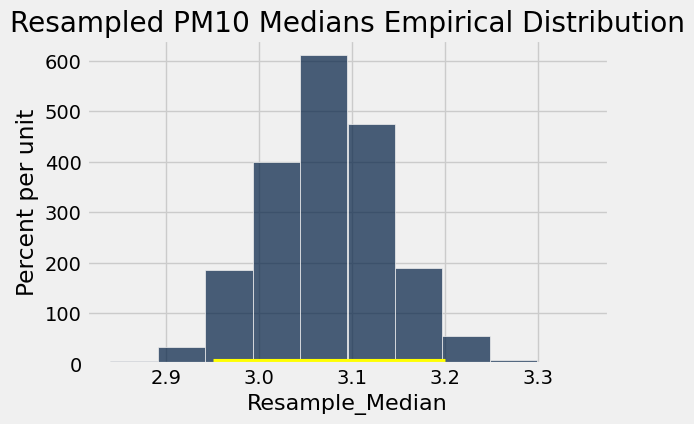

In [29]:
#Task 2.4: Ploting the empirical histogram of the resampled medians with overlaying the confidence interval
resample_medians_table = Table().with_columns("Resample_Median", resample_medians)
resample_medians_table.hist()
plt.plot([left, right], [0, 0], color='yellow', lw=8);
plt.title("Resampled PM10 Medians Empirical Distribution")

In [30]:
#Task 2.5: Reporting the confidence interval and it's context in air quality
#Based on the 5000 resampled bootstrap medians, we are 95% confiedent that the median of pm10 lies between 2.99 and 3.23
#Considering the following categorization of pm10 values: Good: [0, 20], Moderate: (20, 50], Unhealthy: Above 50.
#The median range of (2.99, 3.23) of pm10 vlaue, indicates a clean and good air quality of the selected neighbourhood in NYC.

## <font color = blue size  = 5> **Task 3: Hypothesis Testing Using Confidence Intervals (1.5 Mark)**

**Task Description:**
- Test the hypothesis about the average <font color = red size =5> `pm10` </font> level in the population using confidence intervals.
  - Null Hypothesis (H0): The average pm10 level in the population is `20 μg/m³` .
  - Alternative Hypothesis (Ha): The average pm10 level in the population is not `20 μg/m³` .
- Use the confidence interval method to test this hypothesis:
Construct a 95% confidence interval for the average `pm10` level in the population.
  - If the confidence interval contains `20 μg/m³` , conclude that there is no significant difference from `20 μg/m³` (fail to reject H0).
  - Otherwise, conclude that there is a significant difference (reject H0).
- Interpret your results and explain whether the data supports the null hypothesis or the alternative hypothesis.

In [31]:
#Task 3.1.1: Checking the pm10 mean for the population and sampled data
print("Population data mean: ", np.mean(joined_table.column("pm10")), ", Sample Data mean: ", np.mean(sample_data.column("pm10")))

Population data mean:  16.1723197791 , Sample Data mean:  15.8725170416


In [32]:
#Task 3.1.2: Defining bootstrap function to calculate one mean pm10 value of a sample of the sampled data and use it to estimate the mean for entire set
def bootstrap_mean():
  resample = sample_data.sample()
  resample_mean = np.mean(resample.column('pm10'))
  return resample_mean

In [33]:
#Task 3.1.3: Generating 5000 bootstraps samples means using the function and storing them in array
resample_means = make_array()

for i in np.arange(resample_num):
  resample_means = np.append(resample_means, bootstrap_mean())

resample_means

array([ 15.65569274,  15.52200835,  15.48998381, ...,  16.02960804,
        15.33212082,  15.42200324])

In [45]:
#Task 3.2.1: Constructing the 95% confidence interval of the resampled means data
left_2 = percentile(2.5, resample_means)
right_2 = percentile(97.5, resample_means)

print("Bootstrap interval: ", make_array(left_2, right_2))

Bootstrap interval:  [ 15.19463957  16.52350631]


Text(0.5, 1.0, 'Resampled PM10 Means Empirical Distribution')

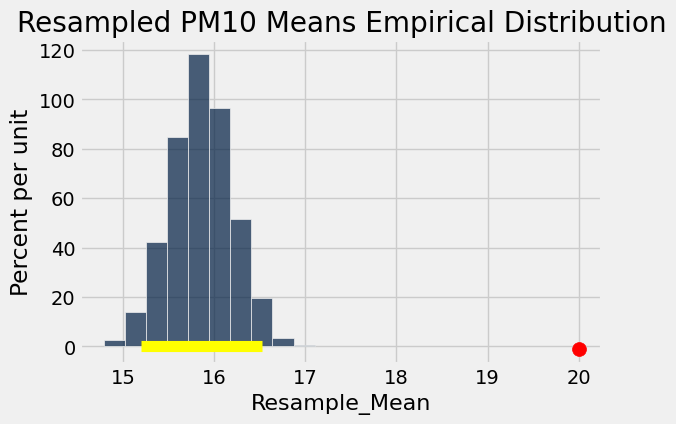

In [35]:
#Task 3.2.2: Ploting the empirical histogram of the resampled means with overlaying the confidence interval and the null hypothesis
resample_means_table = Table().with_columns("Resample_Mean", resample_means)
resample_means_table.hist()
plt.plot([left_2, right_2], [0, 0], color='yellow', lw=8)
plt.scatter(20, -0.01, color='red', s=100)
plt.title("Resampled PM10 Means Empirical Distribution")

In [46]:
#Task 3.3: Explaining the hypothesis result
#Based on the 5000 resampled bootstrap means, we are 95% confiedent that the mean of pm10 lies between 15.19 and 16.52
#The mean of the population (16.17) and first sample (15.87) data also lies with the confidence interval
#Since the model of mean 20 value is not inside the confidence interval and extremly far away from the distribution.
#We reject the null hypothesis, and support the alternative hypothesis where the mean is not 20.

## <font color = blue size  = 5> **Task 4: Percentiles and Extreme Values (1.5 Mark)**


- Use the bootstrap method to simulate the mean `pm10` levels for each neighborhood. Generate 5,000 bootstrap samples for the top 3 neighborhoods with the highest mean pm10 levels.
- Create an empirical histogram for each of these neighborhoods, showing the distribution of the bootstrapped means.
- Overlay horizontal yellow lines to indicate the 95% confidence interval for the mean pm10 level in each neighborhood.


In [55]:
#Task 4.1.1: Defining the top 3 neighborhood based on the highest pm10 levels of the population data as the sample data will change for each run
Top_3_neighborhood = joined_table.group("neighborhood", collect = np.mean).relabeled(1, "pm10").sort("pm10", descending = True).take(np.arange(3)).column(0)
Top_3_neighborhood

array(['Crotona Park', 'Pelham Bay', 'Tremont'],
      dtype='<U18')

In [49]:
#Task 4.1.2: Defining bootstrap function to calculate one mean pm10 value of a sample of the sampled data for the selected neighborhood and use it to estimate the mean for entire neighborhood set
def bootstrap_mean(neighbor):
  resample = sample_data.where("neighborhood", neighbor).sample()
  resample_neighbor_mean = np.mean(resample.column("pm10"))
  return resample_neighbor_mean

In [56]:
#Task 4.1.3: Generating one bootstrap mean for each neighborhood
neighborhood_mean = make_array()
neighborhood = joined_table.group("neighborhood", collect = np.mean)
for neighbor in neighborhood["neighborhood"]:
  neighborhood_mean = np.append(neighborhood_mean, bootstrap_mean(neighbor))

neighborhood.with_columns("resampled mean", neighborhood_mean)

neighborhood,pm10 mean,resampled mean
Allerton,5.58583,0.11
Astoria,4.38463,1.19237
Belmont,19.6865,44.9995
Bronx Park,14.0127,12.8091
Bronxdale,7.83546,6.40892
Civic Center,11.5916,10.9145
Claremont Village,9.76761,24.0229
Concourse,17.1959,11.8956
Concourse Village,22.8654,1.9675
Country Club,13.0752,4.08


In [60]:
#Task 4.1.4: Generating 5000 bootstraps samples means for each of the 3 top neighborhood using the function and storing them in 3 arrays
Top1 = make_array()
Top2 = make_array()
Top3 = make_array()

for i in np.arange(resample_num):
  Top1 = np.append(Top1, bootstrap_mean(Top_3_neighborhood.take(0)))
  Top2 = np.append(Top2, bootstrap_mean(Top_3_neighborhood.take(1)))
  Top3 = np.append(Top3, bootstrap_mean(Top_3_neighborhood.take(2)))

In [61]:
#Task 4.3.1: Constructing the 95% confidence interval of the resampled means data for each of the 3 top neighborhoods
left_top1 = percentile(2.5, Top1)
right_top1 = percentile(97.5, Top1)
left_top2 = percentile(2.5, Top2)
right_top2 = percentile(97.5, Top2)
left_top3 = percentile(2.5, Top3)
right_top3 = percentile(97.5, Top3)

print("Top1 (", Top_3_neighborhood.take(0), "): ", make_array(left_top1, right_top1))
print("Top2 (", Top_3_neighborhood.take(1), "): ", make_array(left_top2, right_top2))
print("Top3 (", Top_3_neighborhood.take(2), "): ", make_array(left_top3, right_top3))

Top1 ( Crotona Park ):  [ 18.39333333  69.61444444]
Top2 ( Pelham Bay ):  [ 11.635  56.165]
Top3 ( Tremont ):  [ 10.7373913   31.81652174]


Text(0.5, 1.0, "Top 3 'Tremont' PM10 Means Empirical Distribution")

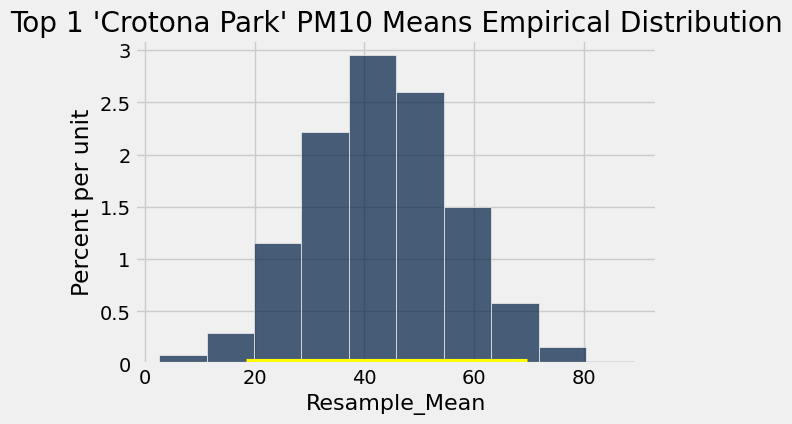

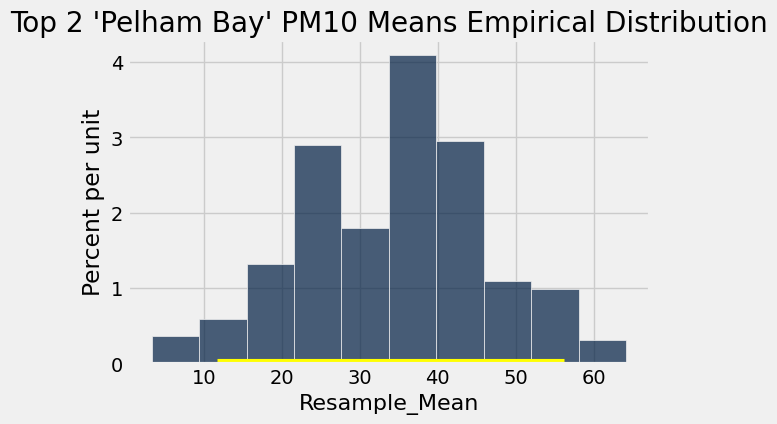

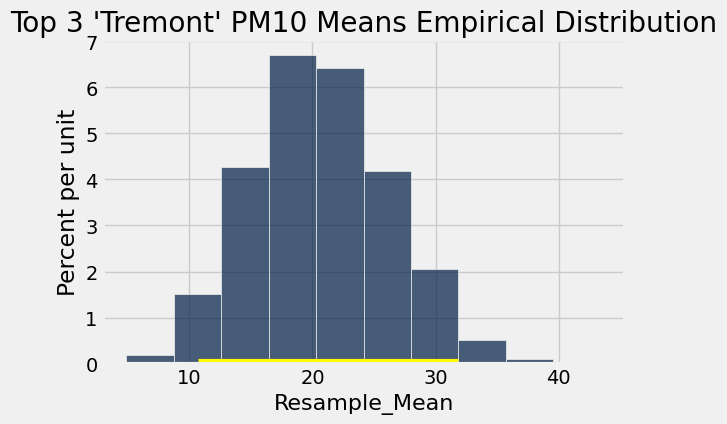

In [62]:
#Task 4.2 & 4.3.2: Ploting the empirical histogram of the resampled means with overlaying the confidence interval and the null hypothesis
#Top1
Top1_table = Table().with_columns("Resample_Mean", Top1)
Top1_table.hist()
plt.plot([left_top1, right_top1], [0, 0], color='yellow', lw=8)
Top1_title = "Top 1 '" + Top_3_neighborhood.take(0) + "' PM10 Means Empirical Distribution"
plt.title(Top1_title)

#Top2
Top2_table = Table().with_columns("Resample_Mean", Top2)
Top2_table.hist()
plt.plot([left_top2, right_top2], [0, 0], color='yellow', lw=8)
Top2_title = "Top 2 '" + Top_3_neighborhood.take(1) + "' PM10 Means Empirical Distribution"
plt.title(Top2_title)

#Top3
Top3_table = Table().with_columns("Resample_Mean", Top3)
Top3_table.hist()
plt.plot([left_top3, right_top3], [0, 0], color='yellow', lw=8)
Top3_title = "Top 3 '" + Top_3_neighborhood.take(2) + "' PM10 Means Empirical Distribution"
plt.title(Top3_title)

In [63]:
#Comments on the resampled means for the 3 tops neighborhoods with high pm10 value of the sample data
#The distribution for the top1 "Crotona Park" neighborhood shows a normal bell shaped (almost symmetric) distribution, which indicate a predictable pm10 mean value.
#The distribution for the top2 "Pelham Bay" neighborhood shows a almost bell shaped distribution with some gaps in the left, which might indicate unpredicable pm10 mean value.
#The distribution for the top3 "Tremont" neighborhood shows a normal bell shaped (almost symmetric) distribution, which indicate a predictable pm10 mean value
#All of the 3 neighborhood has the 20 pm10 value in their intervals, which support the null hypothesis of Task 3.

# Submission Guidelines
- Add a "Open in Colab" button at the top of your notebook using the following Markdown code:
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/your-repo-path/notebook.ipynb)

- Upload your completed Jupyter Notebook to a GitHub repository.
- Submit the link to your GitHub repository in the Blackboard LMS along with the Jupyter solution file.
- <font color = red size = 6> ATTENTION!!! </font> Students are encouraged to work on groups, however the submission should be individual and each student should have her/his own unique final assignment solution, which is to be submitted in BB

# Grading Rubric
based on the following criteria:

- Correctness : The solution produces the expected output using the Table abstraction .
- Clarity : Code is well-organized, readable, and includes comments explaining key steps.
- Creativity : Visualizations and analyses are presented in an engaging and insightful manner.

# Hints for Success
- Use the Table abstraction methods like .select(), .where(), .group(), .apply(), and .sample() for data manipulation.
- Refer to the slides and examples from book Chapters 10, 11, and 13, for guidance on Sampling and Empirical Distributions, Testing Hypotheses,  and Estimation.
- Test your code frequently to ensure it runs without errors.